In [31]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Model")

from ImmuneSystem import ImmuneAutomaton
import matplotlib.pyplot as plt
import tikzplotlib
from ImmuneSystem import AntigenType
import random
import numpy as np

import matplotlib.patches as mpatches

/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Tests


In [32]:
plt.rcParams['text.usetex'] = True

automatonWidth = 100
automatonHeight = 50

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.EXTERNAL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 1
immuneSystem.maxNTCells = 100

immuneSystem.rHelper = 0.005
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1




nSteps = 250
initialFrame = np.zeros((automatonHeight, automatonWidth))
finalFrame = np.zeros((automatonHeight, automatonWidth))

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 5
nColonies = 15

for i in range(0,nColonies):
    xCenter = int(automatonWidth/2) + random.random()*(int(automatonWidth/2) -2*colonyRadius)
    yCenter = 2*colonyRadius + random.random()*(automatonHeight -2*colonyRadius)
    
    for s in range(0,automatonHeight):
        for l in range(0,automatonWidth):
            dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
            if(dst < colonyRadius):
                antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)
initialFrame = immuneSystem.getRefinedPicture()
                
    



for i in range(0,nSteps):
    immuneSystem.stepImmuneAutomaton()
    if(i%100 == 0):
        print(i)

finalFrame = immuneSystem.getRefinedPicture()





0
100
200


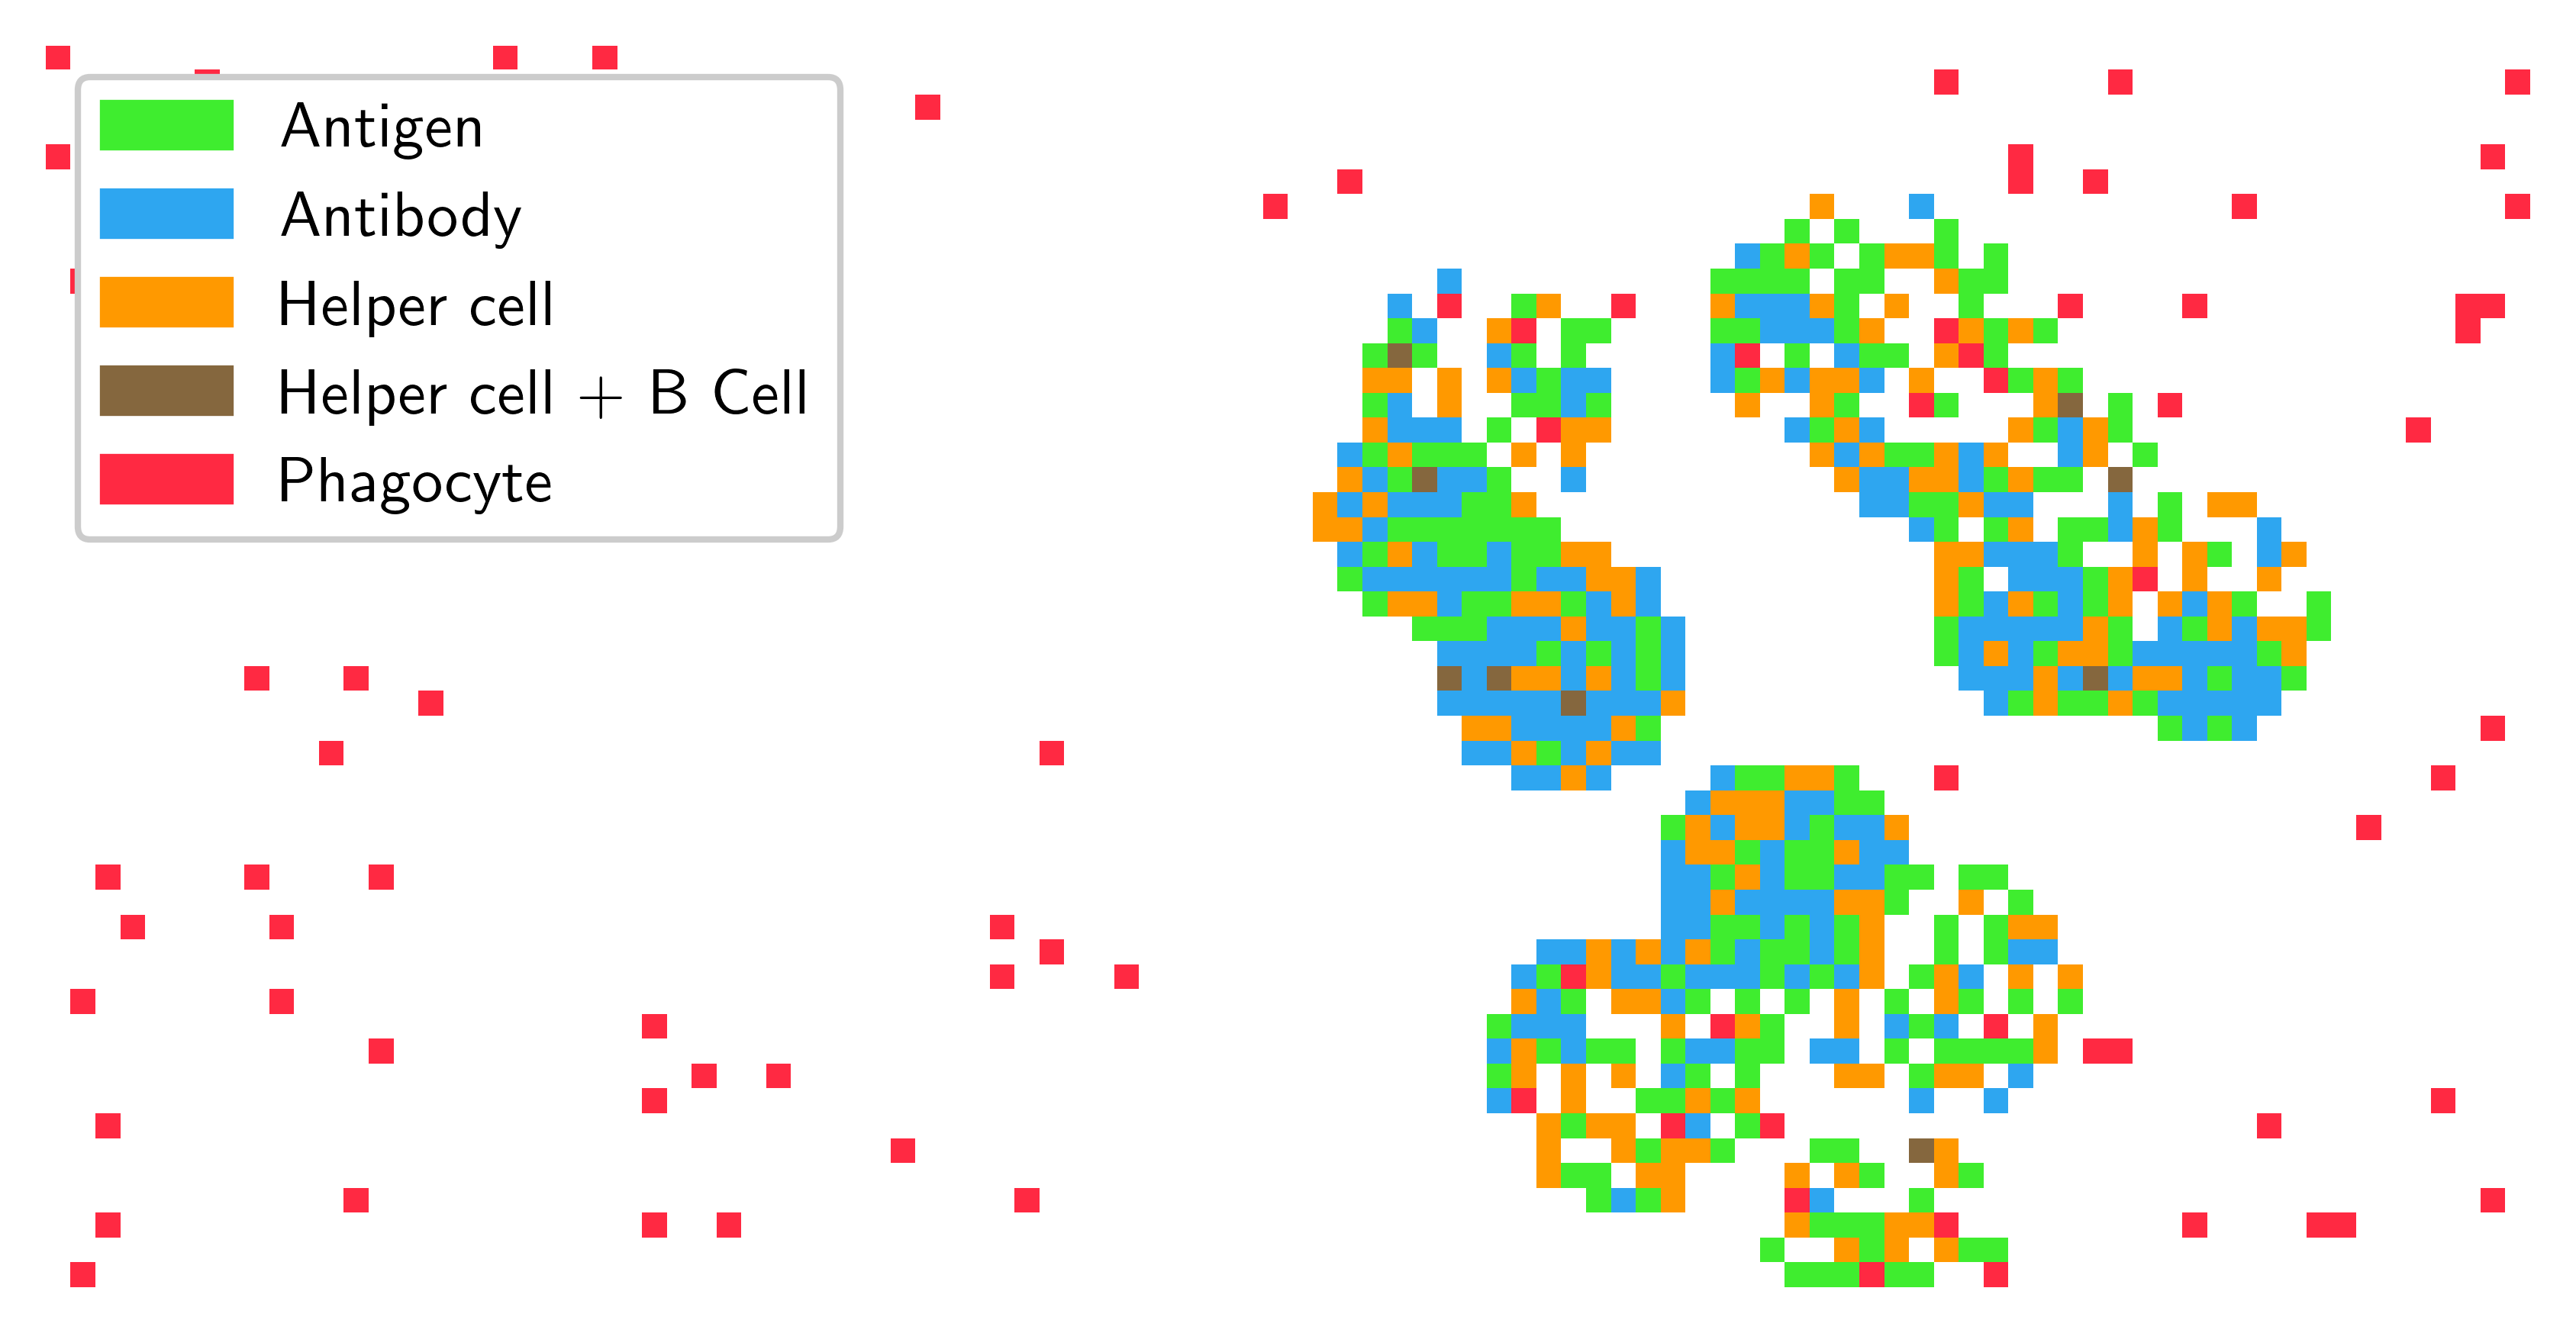

In [33]:
pAntigen= mpatches.Patch(color=[63/255, 237/255, 47/255], label='Antigen')
pAntibody= mpatches.Patch(color=[46/255, 166/255, 240/255], label='Antibody')
pHelper= mpatches.Patch(color=[255/255, 153/255, 0/255], label='Helper cell')
pBCell = mpatches.Patch(color=[133/255, 103/255, 62/255], label='Helper cell + B Cell')
pMacrophage = mpatches.Patch(color=[255/255, 41/255, 66/255], label='Phagocyte')

fig = plt.figure(figsize = (7,10), dpi = 600)
plt.imshow(finalFrame)
plt.axis('off')
plt.legend(handles=[pAntigen, pAntibody, pHelper, pBCell, pMacrophage],loc='upper left',framealpha=1)


plt.savefig('immune_demo_a.pdf',bbox_inches='tight')

In [29]:
automatonWidth = 100
automatonHeight = 50

immuneSystem = ImmuneAutomaton(automatonWidth, automatonHeight, AntigenType.CELL)
immuneSystem.minTCellProductionRate = 1
immuneSystem.maxTCellProductionRate = 4
immuneSystem.tCellProductionRate = 1
immuneSystem.maxNTCells = 100

immuneSystem.rHelper = 0.005
immuneSystem.rBCell = 0.01
immuneSystem.rAntibody = 0.1




nSteps = 250
initialFrame = np.zeros((automatonHeight, automatonWidth))
finalFrame = np.zeros((automatonHeight, automatonWidth))

#Initialize the antigen.
antigenPositions = np.zeros((automatonHeight, automatonWidth))
colonyRadius = 12
nColonies = 1

for i in range(0,nColonies):
    xCenter = int(automatonWidth/2) + random.random()*(int(automatonWidth/2) -2*colonyRadius)
    yCenter = 2*colonyRadius + random.random()*(automatonHeight -2*colonyRadius)
    
    for s in range(0,automatonHeight):
        for l in range(0,automatonWidth):
            dst = np.sqrt((s - yCenter)**2 + (l - xCenter)**2)
            if(dst < colonyRadius):
                antigenPositions[s,l] = 1
immuneSystem.setAntigenPositions(antigenPositions)
initialFrame = immuneSystem.getRefinedPicture()
                
    



for i in range(0,nSteps):
    immuneSystem.stepImmuneAutomaton()
    if(i%100 == 0):
        print(i)

finalFrame = immuneSystem.getRefinedPicture()




0
100
200


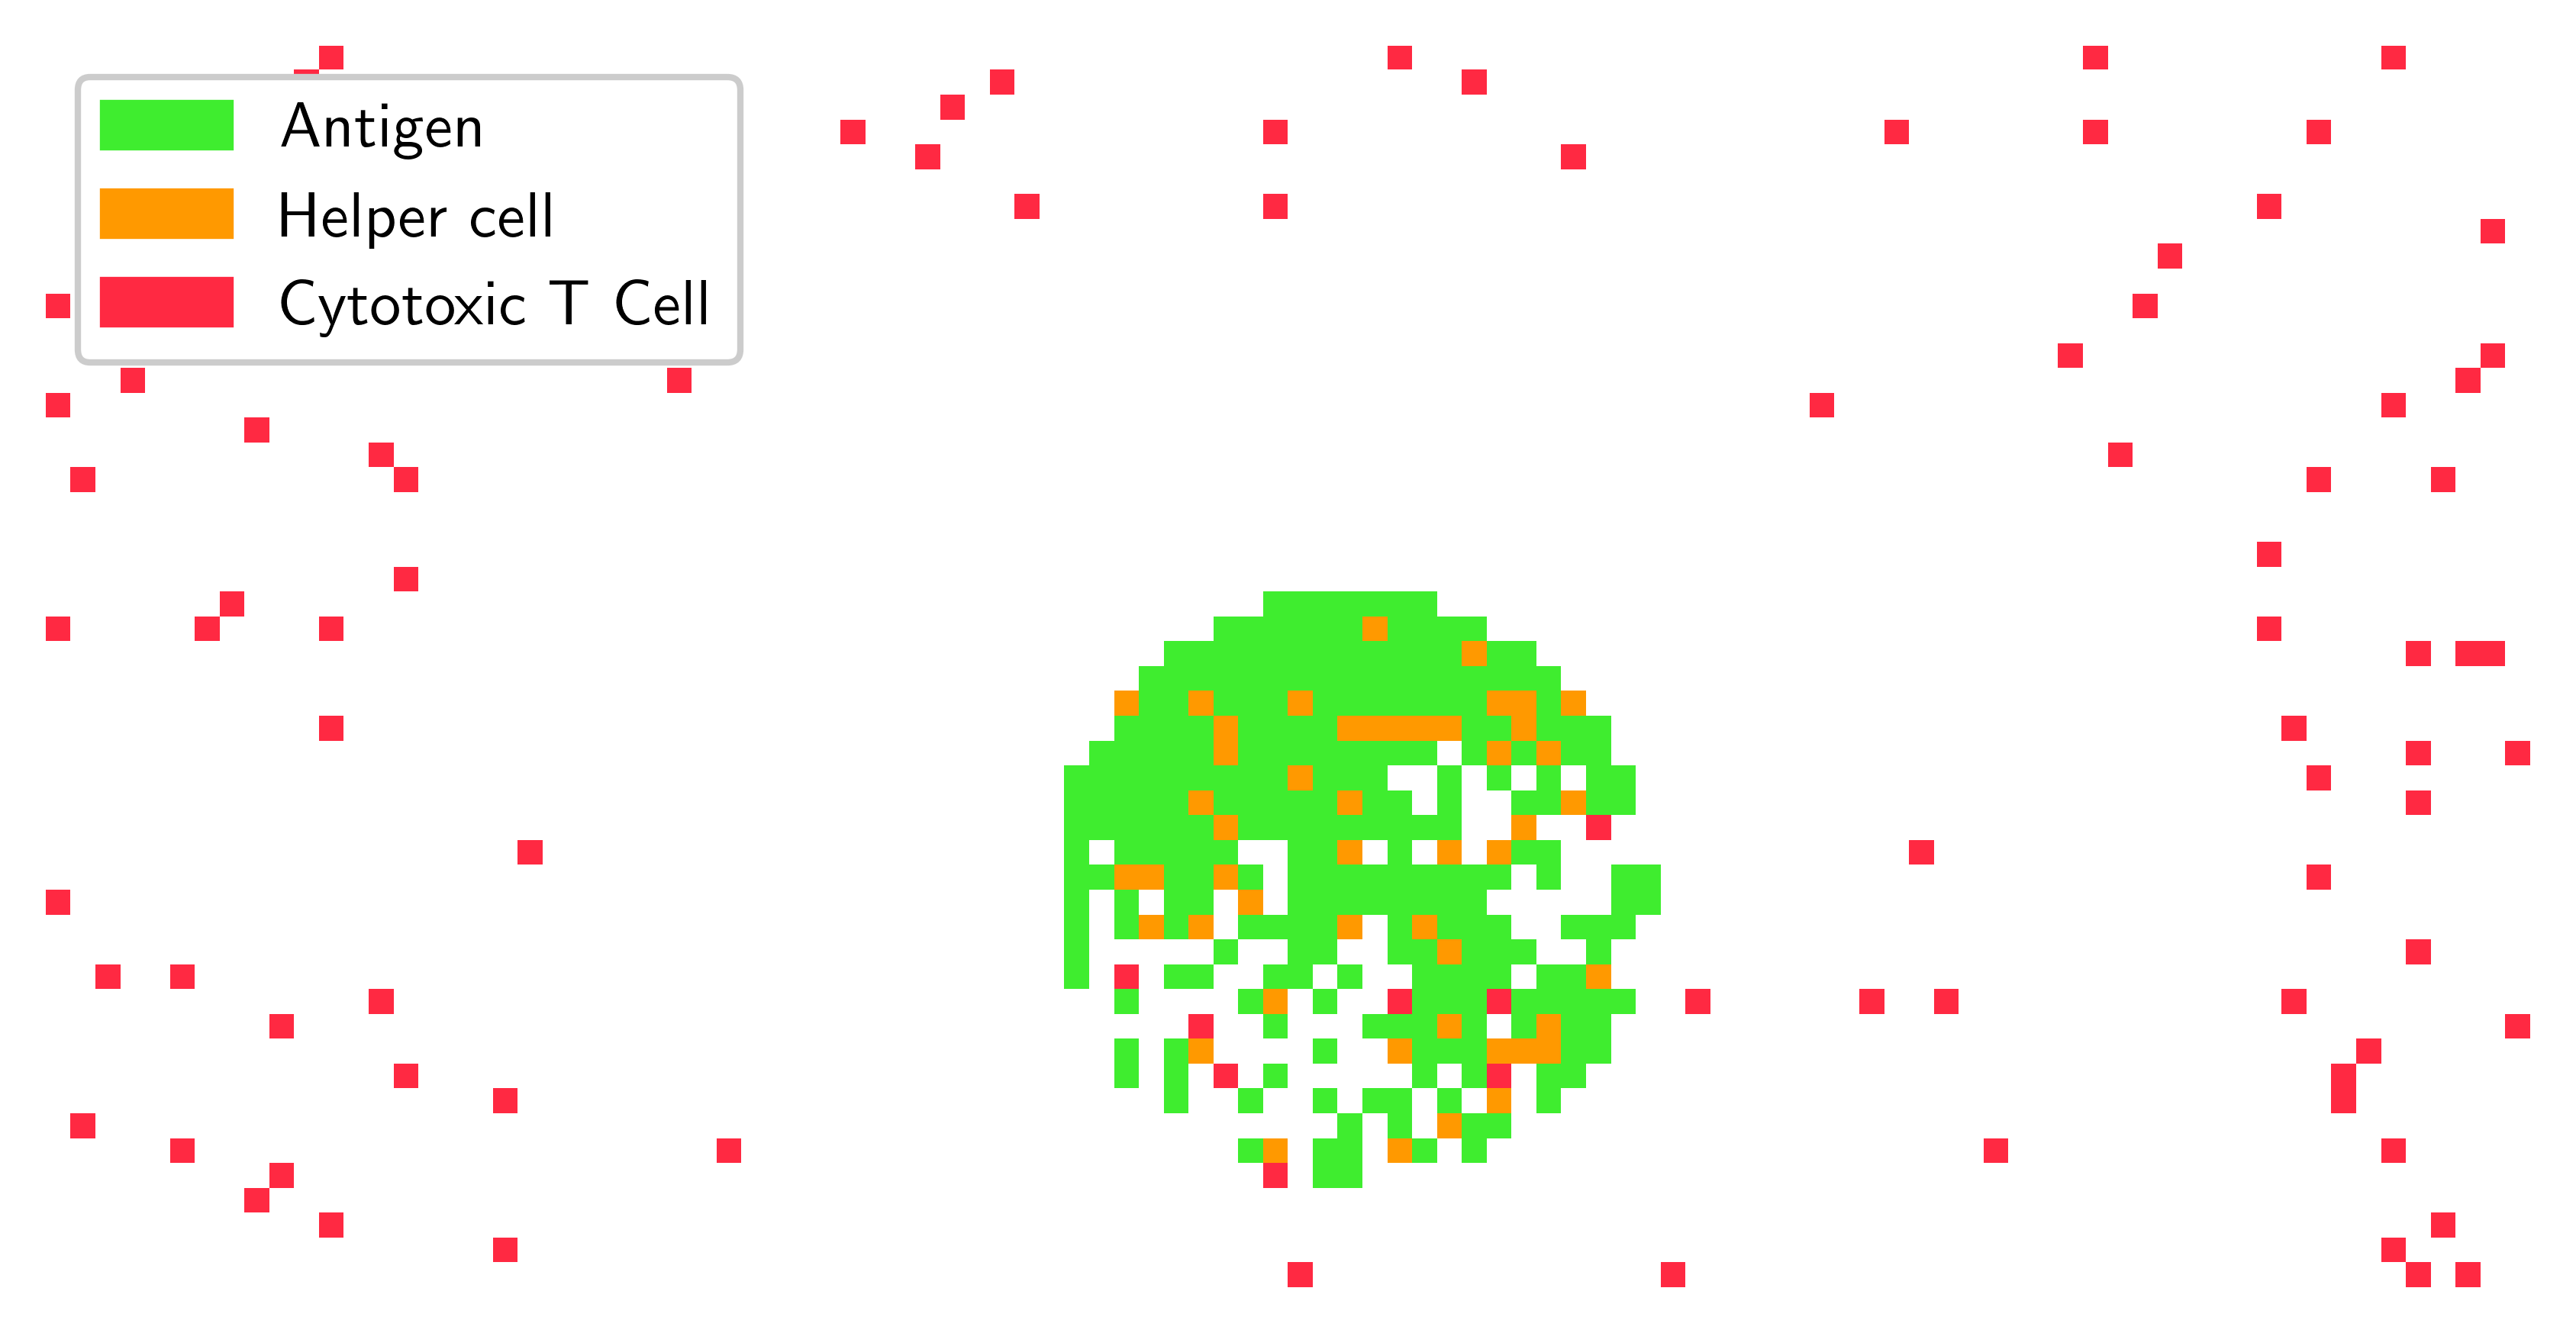

In [30]:
pAntigen= mpatches.Patch(color=[63/255, 237/255, 47/255], label='Antigen')
pHelper= mpatches.Patch(color=[255/255, 153/255, 0/255], label='Helper cell')
pMacrophage = mpatches.Patch(color=[255/255, 41/255, 66/255], label='Cytotoxic T Cell')

fig = plt.figure(figsize = (7,10), dpi = 600)
plt.imshow(finalFrame)
plt.axis('off')
plt.legend(handles=[pAntigen, pHelper, pMacrophage],loc='upper left',framealpha=1)


plt.savefig('immune_demo_b.pdf',bbox_inches='tight')